In [1]:
import pandas as pd

data = pd.read_csv('BrakingDistance.csv')
data.head()

,speed (mph),distance (ft)
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact

x = data['speed (mph)']
y = data['distance (ft)']

def fit(m, c):
    y2 = m * x + c
    
    plt.plot(x, y, 'o')
    plt.plot(x, y2)
    plt.xlabel('Speed (mph)')
    plt.ylabel('Distance (ft)')
    plt.show()

interact(fit, m=(0, 5, 0.1), c=(0, 5, 0.1))

interactive(children=(FloatSlider(value=2.0, description='m', max=5.0), FloatSlider(value=2.0, description='c'…

<function __main__.fit(m, c)>

In [3]:
import numpy as np

speeds = np.array([6, 22, 50])

def model(x):
    return 2.7 * x + 0.7

model(speeds)

array([ 16.9,  60.1, 135.7])

In [4]:
ccs = pd.read_excel('ConcreteData.xlsx')
ccs.head()

,Cement (kg),Blast Furnace Slag (kg),Fly Ash (kg),Water (kg),Superplasticizer (kg),Coarse Aggregate (kg),Fine Aggregate (kg),Age (day),CCS (MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


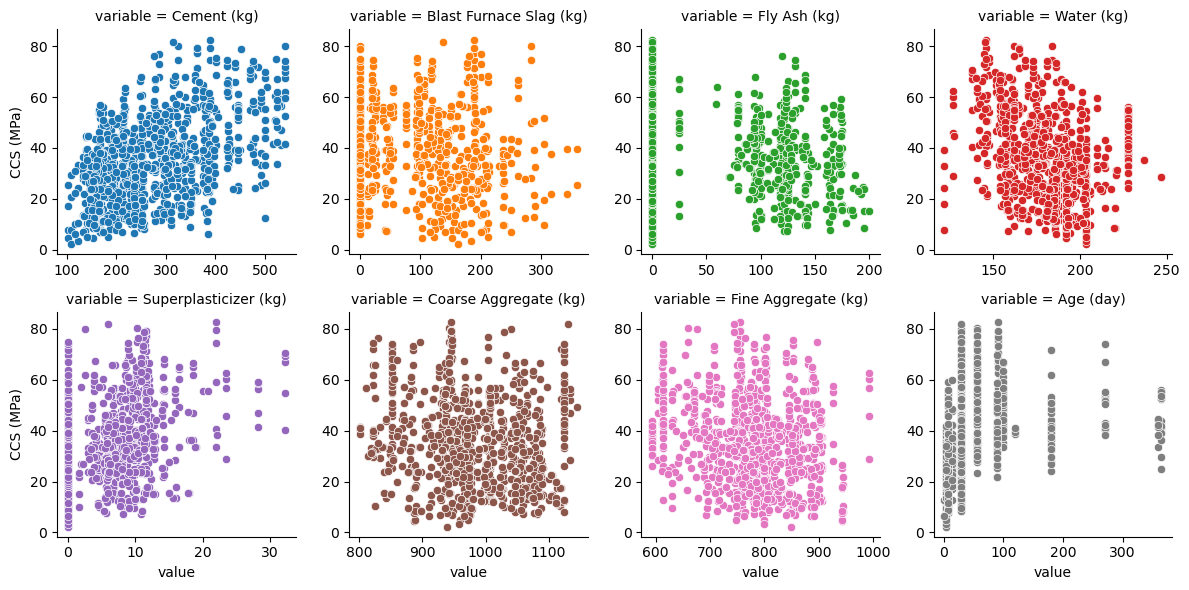

In [5]:
import seaborn as sns

ccs_melted = ccs.melt(id_vars='CCS (MPa)')

g = sns.FacetGrid(ccs_melted, col='variable', col_wrap=4, sharex=False, sharey=False, hue='variable')
g.map_dataframe(sns.scatterplot, x='value', y='CCS (MPa)')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = ccs.drop(columns=['CCS (MPa)'])
y = ccs['CCS (MPa)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

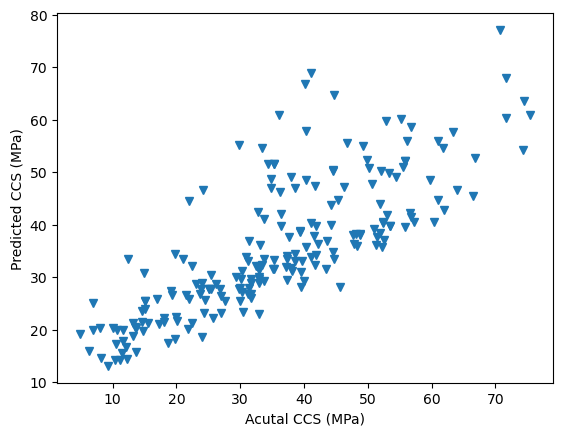

In [7]:
y_pred = model.predict(X_test)

plt.plot(y_test, y_pred, 'v')
plt.xlabel('Acutal CCS (MPa)')
plt.ylabel('Predicted CCS (MPa)')
plt.show()

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.627541605542902

In [9]:
sample = pd.DataFrame({
    'Cement (kg)': [100.8],
    'Blast Furnace Slag (kg)': [252], 
    'Fly Ash (kg)': [110],
    'Water (kg)': [200.2], 
    'Superplasticizer (kg)': [10.5], 
    'Coarse Aggregate (kg)': [1000], 
    'Fine Aggregate (kg)': [700.6], 
    'Age (day)': [290]
})

sample

,Cement (kg),Blast Furnace Slag (kg),Fly Ash (kg),Water (kg),Superplasticizer (kg),Coarse Aggregate (kg),Fine Aggregate (kg),Age (day)
0,100.8,252,110,200.2,10.5,1000,700.6,290


In [10]:
model.predict(sample)

array([64.24456947])

In [11]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.neural_network import MLPRegressor

In [18]:
x = data[['speed (mph)']]
y = data['distance (ft)']

In [ ]:
def fit(nn, w):
    model = KNeighborsRegressor(n_neighbors=nn, weights=w)

    model.fit(x, y)
    y2 = model.predict(x)
    
    plt.plot(x, y, 'o')
    plt.plot(x, y2)
    plt.xlabel('Speed (mph)')
    plt.ylabel('Distance (ft)')
    plt.show()

interact(fit, nn=(0, 10, 1), w=['uniform', 'distance'])

interactive(children=(IntSlider(value=5, description='nn', max=10), Dropdown(description='w', options=('unifor…

<function __main__.fit(nn, w)>

In [17]:
x.values

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25])